In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import plotly.express as px
from plotly import graph_objects as go
from matplotlib.ticker import StrMethodFormatter
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

sns.set_theme(style="dark")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [142]:
df = pd.read_pickle('train.pkl')

In [143]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.00,0,0.00,0,0,244.80,1,1466,0.44
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.00,0,11.04,0,0,1434.00,5,0,0.64
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.00,0,0.00,0,0,161.80,2,0,0.78
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.00,0,0.00,0,0,202.70,3,0,0.17
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.00,0,0.00,0,0,49.75,2,0,0.19


In [144]:
x = df[df.columns.difference(['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc'])]

In [145]:
x.head()

,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0,0.00,0,0,60,1241,0,0,0.00,1306,28,26,-1,0,0.00,0,0.00,0,0,244.80,1,1466
1,0,0,0,91.47,0,0,57,0,0,0,0.00,1777,26,25,1484,0,0.00,0,11.04,0,0,1434.00,5,0
2,0,1,0,68.00,0,0,47,0,0,0,0.00,1318,50,47,1491,0,0.00,0,0.00,0,0,161.80,2,0
3,0,0,0,32.90,0,0,75,0,0,0,0.00,1436,31,30,1408,0,0.00,0,0.00,0,0,202.70,3,0
4,0,0,0,100.00,0,0,45,0,1,1,58.53,1424,97,95,1560,0,0.00,0,0.00,0,0,49.75,2,0


In [146]:
y = df.winPlacePerc

In [147]:
ss = StandardScaler()
xs = ss.fit_transform(x)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.3, random_state=20)

In [84]:
ln = LinearRegression()
ln.fit(x_train, y_train)
ln_scores = cross_val_score(ln, x_train, y_train, cv=10)

print(ln_scores)
print(np.mean(ln_scores))

[0.8313833  0.83134248 0.8300331  0.83116966 0.83082918 0.82882614
 0.83065234 0.82983827 0.83086208 0.82994914]
0.8304885683541894


In [85]:
optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(x_train, y_train,)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0002492761995730044


In [86]:
lasso = LassoCV(n_alphas=1, cv=10)
lasso.fit(x_train, y_train)
lasso_scores = cross_val_score(lasso, x_train, y_train, cv=10)
print(lasso_scores)
print(np.mean(lasso_scores))

[0.83032798 0.83017031 0.82898306 0.83006586 0.82977162 0.82782036
 0.82972294 0.82881917 0.8298335  0.8289516 ]
0.8294466413429806


In [139]:
print(lasso.coef_)

[-4.35283362e-03  8.63126142e-03  2.47016617e-02  7.07611636e-03
  2.29524017e-04  1.93831095e-03 -1.89526480e-01 -3.97640432e-03
 -9.36985274e-02 -2.05677046e-02  1.31670262e-04 -4.22378804e-02
 -5.44396133e-02  8.27005996e-02  3.80271276e-02  6.56335236e-03
  2.69257098e-02  4.99700520e-04  3.14534314e-03 -2.17712484e-03
  6.26743057e-04  1.37146744e-01  2.77878119e-02  4.20339867e-02]


In [163]:
ridge_alphas = np.logspace(0, 5, 20)
print(ridge_alphas)
ridge_alphas
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x_train, y_train)

print(optimal_ridge.alpha_)

[1.00000000e+00 1.83298071e+00 3.35981829e+00 6.15848211e+00
 1.12883789e+01 2.06913808e+01 3.79269019e+01 6.95192796e+01
 1.27427499e+02 2.33572147e+02 4.28133240e+02 7.84759970e+02
 1.43844989e+03 2.63665090e+03 4.83293024e+03 8.85866790e+03
 1.62377674e+04 2.97635144e+04 5.45559478e+04 1.00000000e+05]
1.0


In [164]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(x_train, y_train)
ridge_scores = cross_val_score(ridge, x_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.83138328 0.83134245 0.83003311 0.83116965 0.83082918 0.82882615
 0.83065237 0.82983827 0.83086208 0.82994914]
0.8304885683845541


In [161]:
print(optimal_ridge.coef_)

[-0.00544444  0.00848294  0.02466813  0.00975084  0.00103432  0.00190528
 -0.1923558  -0.02422543 -0.09523158 -0.02344914  0.00038539 -0.041556
 -0.18158098  0.20827107  0.08240208  0.00680613  0.0266004   0.00089359
  0.00333645 -0.00238164  0.00087779  0.13567815  0.02743705  0.10606036]


In [105]:
x_train.shape

(3112875, 24)

In [106]:
sqrt(24)

4.898979485566356

In [123]:
rf = RandomForestRegressor(n_estimators=20, min_samples_split=5)
rf.fit(x_train, y_train)
rf_scores = cross_val_score(rf, x_train, y_train, cv=5)

print(rf_scores)
print(np.mean(rf_scores))

[0.92432161 0.92384264 0.92363741 0.92427295 0.92371503]
0.9239579286725925


In [124]:
ar = AdaBoostRegressor(n_estimators=20)
ar.fit(x_train, y_train)
ar_scores = cross_val_score(ar, x_train, y_train, cv=10)

print(ar_scores)
print(np.mean(ar_scores))

[0.82588634 0.82512191 0.82250896 0.82196835 0.82298986 0.82295904
 0.82577894 0.82654664 0.82365544 0.82396132]
0.8241376800467485


In [125]:
gr = GradientBoostingRegressor(n_estimators=20, min_samples_split=5)
gr.fit(x_train, y_train)
gr_scores = cross_val_score(gr, x_train, y_train, cv=10)

print(gr_scores)
print(np.mean(gr_scores))

[0.83132079 0.83035053 0.82869434 0.82927804 0.82924038 0.82926812
 0.82975854 0.82918265 0.8301654  0.82897368]
0.8296232475355565


In [89]:
# normalizing predicitons into prediction range of 0 - 1

y_pred_lin = np.minimum(1, np.maximum(0., ln.predict(x_test)))

In [90]:
# normalizing predicitons into prediction range of 0 - 1

y_pred = np.minimum(1, np.maximum(0., ridge.predict(x_test)))

In [91]:
# normalizing predicitons into prediction range of 0 - 1

y_pred_lasso = np.minimum(1, np.maximum(0., lasso.predict(x_test)))

In [129]:
y_pred_rf = rf.predict(x_test)

In [130]:
y_pred_ar = ar.predict(x_test)

In [131]:
y_pred_gr = gr.predict(x_test)

In [92]:
y_pred_lin.min()

0.0

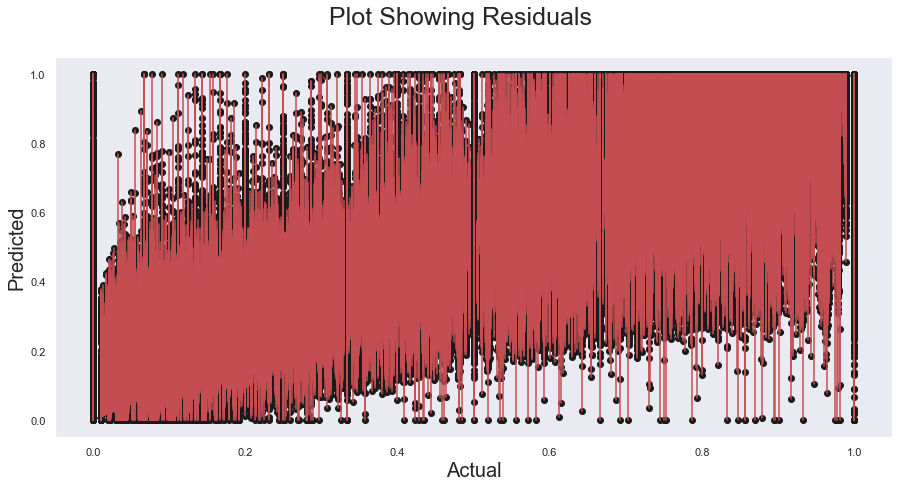

In [93]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(x=y_test, y=y_pred_lin, c='k')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k');
fig.suptitle('Plot Showing Residuals', fontsize=25)
plt.ylabel("Predicted", fontsize=20)
plt.xlabel("Actual", fontsize=20)
for x, y in zip(y_test, y_pred_lin):
    ax.plot((x, x), (x, y), 'r-')

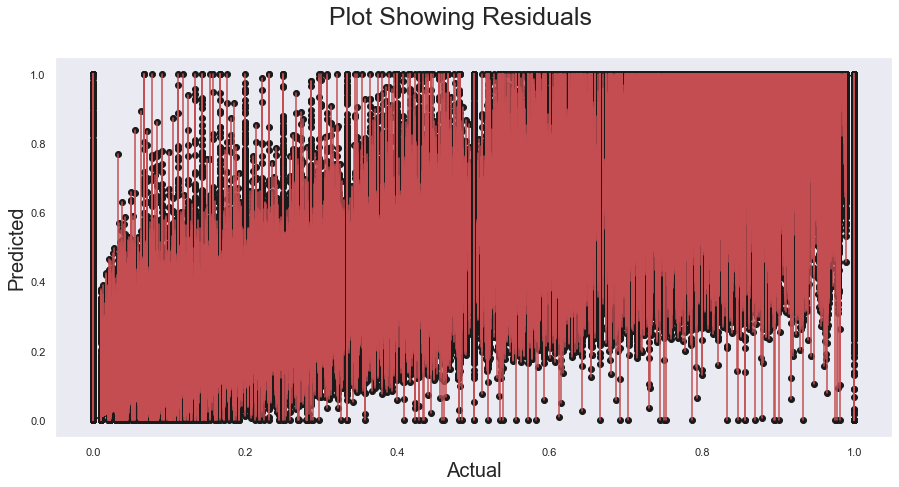

In [94]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(x=y_test, y=y_pred, c='k')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k');
fig.suptitle('Plot Showing Residuals', fontsize=25)
plt.ylabel("Predicted", fontsize=20)
plt.xlabel("Actual", fontsize=20)
for x, y in zip(y_test, y_pred):
    ax.plot((x, x), (x, y), 'r-')

In [95]:
y_pred.min()

0.0

In [96]:
y_test.min()

0.0

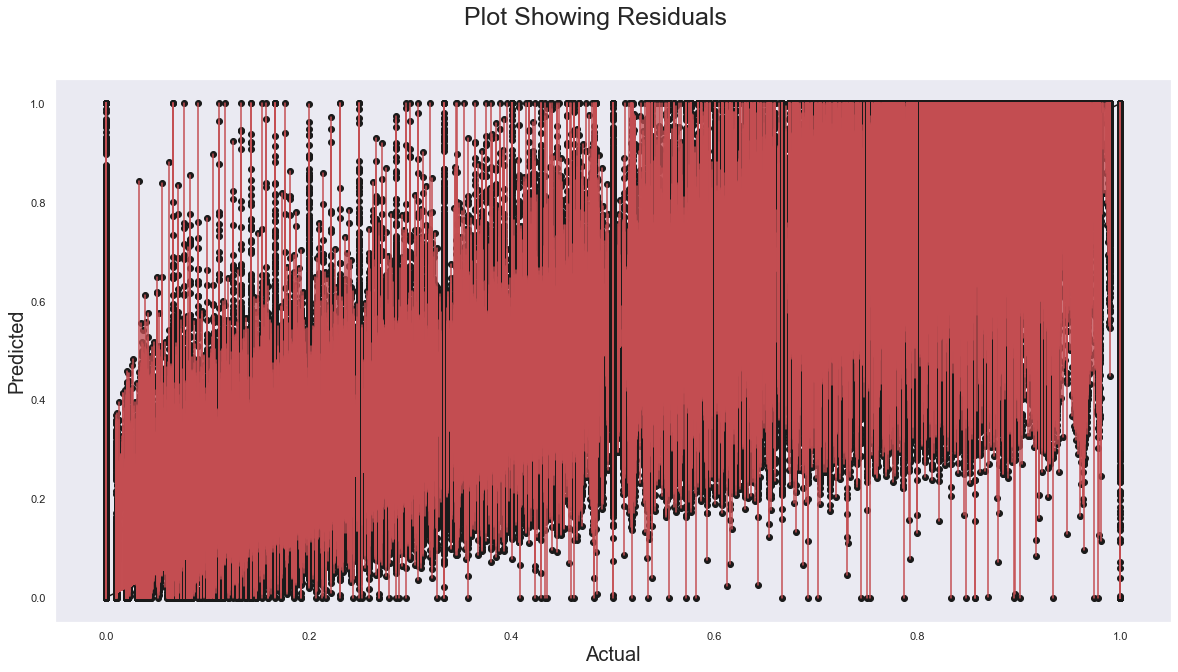

In [97]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x=y_test, y=y_pred_lasso, c='k')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k');
fig.suptitle('Plot Showing Residuals', fontsize=25)
plt.ylabel("Predicted", fontsize=20)
plt.xlabel("Actual", fontsize=20)
for x, y in zip(y_test, y_pred_lasso):
    ax.plot((x, x), (x, y), 'r-')

In [98]:
y_pred_lasso.min()

0.0

In [99]:
y_pred_lasso

array([0.98355269, 0.88233416, 0.60782152, ..., 0.81123003, 0.70114921,
       0.48412089])

In [100]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('mse', mean_squared_error(y_test, y_pred_lasso))
print('mae', mean_absolute_error(y_test, y_pred_lasso))

rmse 0.12416715188830953
mse 0.015417481608054529
mae 0.09041482272807551


In [101]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred)))
print('mse', mean_squared_error(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

rmse 0.12370623312848794
mse 0.015303232114839808
mae 0.0901148144376778


In [102]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_lin)))
print('mse', mean_squared_error(y_test, y_pred_lin))
print('mae', mean_absolute_error(y_test, y_pred_lin))

rmse 0.12370621421068095
mse 0.015303227434338883
mae 0.09011482391680505


In [132]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_rf)))
print('mse', mean_squared_error(y_test, y_pred_rf))
print('mae', mean_absolute_error(y_test, y_pred_rf))

rmse 0.08456637557179086
mse 0.007151471877349187
mae 0.059816329159988406


In [133]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_ar)))
print('mse', mean_squared_error(y_test, y_pred_ar))
print('mae', mean_absolute_error(y_test, y_pred_ar))

rmse 0.1289966218329861
mse 0.01664012844432243
mae 0.09672125271653889


In [134]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_gr)))
print('mse', mean_squared_error(y_test, y_pred_gr))
print('mae', mean_absolute_error(y_test, y_pred_gr))

rmse 0.12664753335555778
mse 0.016039597705047124
mae 0.09601589035860451


In [136]:
print("Random forest regressor with the best accuracy 92%, lowest root mean squared error, mean squared error, and mean absolute error")

Random forest regressor with the best accuracy 92%, lowest root mean squared error, mean squared error, and mean absolute error


In [172]:
columns = ["R-Square", "Root MSE", "MSE", "MAE"]
rows = ["Linear Regression", "LassoCV", "RidgeCV", "Random Forest", "Ada Boost", "Gradient Boost"]
data = np.array([[np.mean(ln_scores), sqrt(mean_squared_error(y_test, y_pred_lin)), mean_squared_error(y_test, y_pred_lin), mean_absolute_error(y_test, y_pred_lin)], 
                 [np.mean(lasso_scores), sqrt(mean_squared_error(y_test, y_pred_lasso)), mean_squared_error(y_test, y_pred_lasso), mean_absolute_error(y_test, y_pred_lasso)], 
                 [np.mean(ridge_scores), sqrt(mean_squared_error(y_test, y_pred)), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)], 
                 [np.mean(rf_scores), sqrt(mean_squared_error(y_test, y_pred_rf)), mean_squared_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf)], 
                 [np.mean(ar_scores), sqrt(mean_squared_error(y_test, y_pred_ar)), mean_squared_error(y_test, y_pred_ar), mean_absolute_error(y_test, y_pred_ar)], 
                 [np.mean(gr_scores), sqrt(mean_squared_error(y_test, y_pred_gr)), mean_squared_error(y_test, y_pred_gr), mean_absolute_error(y_test, y_pred_gr)]]) 
result = pd.DataFrame(data=data, index=rows, columns=columns)

In [173]:
result

,R-Square,Root MSE,MSE,MAE
Linear Regression,0.83,0.12,0.02,0.09
LassoCV,0.83,0.12,0.02,0.09
RidgeCV,0.83,0.12,0.02,0.09
Random Forest,0.92,0.08,0.01,0.06
Ada Boost,0.82,0.13,0.02,0.10
Gradient Boost,0.83,0.13,0.02,0.10
